In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
# Mutating Data for ML
df = pd.read_csv("eda-german-credit",delim_whitespace=True,header=None)
df.head()
df.shape
l=["Checking.Account", "Duration", "Credit.History", "Purpose", 
                 "Credit.Amount", "Savings.Account/Bonds", "Present.employee", 
                 "Installment.rate", "Personal.Status.and.Sex", "Other.Debters", 
                 "Present.Residence.Since", "Property", "Age.in.Years", 
                 "Other.Installment.plans", "Housing", 
                 "Number.of.existing.credits.at.this.bank", 
                 "Job", "Liable.to.Provide.Maintainance", 
                 "Telephone", "Foreign.Worker", "Outcome"]
df=df.rename(columns=dict(zip(df.columns,l)))
df.head()
df = df.replace(["A11", "A12", "A13", "A14", "A30","A31", "A32", "A33","A34","A40","A41","A42","A43","A44","A45","A46","A47","A48","A49","A410","A61","A62","A63","A64","A65","A71","A73","A74","A75","A72","A91","A92","A93","A94","A95","A101","A102","A103","A121","A122","A123","A124","A141","A142","A143","A151","A152","A153","A171","A172","A173","A174","A191","A192","A201","A202"],
                ["< 0", "0 <= Checking < 200", "Checking >= 200", "No Checking account", "no credits taken/all credits paid back duly", "all credits at this bank paid back duly", "existing credits paid back duly till now", "delay in paying off in the past", "critical account/other credits existing (not at this bank)","New Car","Used Car","Furniture/Equipment","Radio or Television","Domestic Appliances","Repairs","Education","Vacation","Retraining","Business","Others","Less Than 100","100 <= Savings < 500","500 <= Savings < 1000","Savings >=1000","Unknown/No Savinhgs Account","Unemployed","1 <= Exp < 4","4 <= Exp <7","Exp >= 7","Exp < 1","Male and Diovorced/Seperated","Female and Divorced/Seperated","Male and single","Male and Married","Female and Single","None","Co-Applicant","Guarantor","Real Estate","Life Insurance","Car or other Property","Unknown/No Property","Bank","stores","None","Rent","Own","For Free","Unemployed/Unskiled","Unskilled","Skilled-Employee/Official","Self-Employed/Highly Qualified","No Number","Registered Number","Yes","No"])
df
df['Outcome']=df['Outcome'].replace([1,2],["Good","Bad"])
df.head()


In [ ]:
## Splitting Personal Status and Sex Columns
df[["Sex","Personal.Status"]]=df["Personal.Status.and.Sex"].str.split("and",expand=True)
df.head()
df = df.drop('Personal.Status.and.Sex', axis=1)
df.head()
from sklearn import preprocessing
qualColumns=["Checking.Account", "Credit.History", "Purpose", 
                "Savings.Account/Bonds", "Present.employee", 
                "Other.Debters", "Property", "Other.Installment.plans", 
                "Housing", "Job", "Telephone", "Foreign.Worker", "Outcome", 
                "Sex", "Personal.Status"]
for col in qualColumns:
    labelEncoder = preprocessing.LabelEncoder()
    df[col]= labelEncoder.fit_transform(df[col])
df.head()
df.to_csv('eda-german-credit-mutated',index=False)

In [ ]:
#df = pd.read_csv('data/eda-german-credit.csv')

In [ ]:
df.head()

,Checking.Account,Duration,Credit.History,Purpose,Credit.Amount,Savings.Account.Bonds,Present.employee,Installment.rate,Other.Debters,Present.Residence.Since,...,Other.Installment.plans,Housing,Number.of.existing.credits.at.this.bank,Job,Liable.to.Provide.Maintainance,Telephone,Foreign.Worker,Outcome,Sex,Personal Status
0,< 0,6,critical account/other credits existing (not a...,Radio or Television,1169,Unkown/No Savings Account,Exp >= 7,4,None,4,...,None,Own,2,Skilled-Employee/Official,1,Registered Number,Yes,Good,Male,Single
1,0 <= Checking < 200,48,existing credits paid back duly till now,Radio or Television,5951,Less than 100,1 <= Exp < 4,2,None,2,...,None,Own,1,Skilled-Employee/Official,1,No Number,Yes,Bad,Female,Divorced/Seperated/Married
2,No Checking account,12,critical account/other credits existing (not a...,Education,2096,Less than 100,4 <= Exp <7,2,None,3,...,None,Own,1,Unskilled,2,No Number,Yes,Good,Male,Single
3,< 0,42,existing credits paid back duly till now,Furniture/Equipment,7882,Less than 100,4 <= Exp <7,2,Guarantor,4,...,None,For Free,1,Skilled-Employee/Official,2,No Number,Yes,Good,Male,Single
4,< 0,24,delay in paying off in the past,New Car,4870,Less than 100,1 <= Exp < 4,3,None,4,...,None,For Free,2,Skilled-Employee/Official,2,No Number,Yes,Bad,Male,Single


In [ ]:
df.tail()

,Checking.Account,Duration,Credit.History,Purpose,Credit.Amount,Savings.Account.Bonds,Present.employee,Installment.rate,Other.Debters,Present.Residence.Since,...,Other.Installment.plans,Housing,Number.of.existing.credits.at.this.bank,Job,Liable.to.Provide.Maintainance,Telephone,Foreign.Worker,Outcome,Sex,Personal Status
995,No Checking account,12,existing credits paid back duly till now,Furniture/Equipment,1736,Less than 100,4 <= Exp <7,3,None,4,...,None,Own,1,Unskilled,1,No Number,Yes,Good,Female,Divorced/Seperated/Married
996,< 0,30,existing credits paid back duly till now,Used Car,3857,Less than 100,1 <= Exp < 4,4,None,4,...,None,Own,1,Self-Employed/Highly Qualified,1,Registered Number,Yes,Good,Male,Divorced/Seperated
997,No Checking account,12,existing credits paid back duly till now,Radio or Television,804,Less than 100,Exp >= 7,4,None,4,...,None,Own,1,Skilled-Employee/Official,1,No Number,Yes,Good,Male,Single
998,< 0,45,existing credits paid back duly till now,Radio or Television,1845,Less than 100,1 <= Exp < 4,4,None,4,...,None,For Free,1,Skilled-Employee/Official,1,Registered Number,Yes,Bad,Male,Single
999,0 <= Checking < 200,45,critical account/other credits existing (not a...,Used Car,4576,100 <= Savings < 500,Unemployed,3,None,4,...,None,Own,1,Skilled-Employee/Official,1,No Number,Yes,Good,Male,Single


In [ ]:
df.shape

(1000, 21)

In [ ]:
 from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns="Outcome", axis = 1)
y = df["Outcome"]

KeyError: "['Outcome'] not found in axis"

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

ValueError: could not convert string to float: '< 0'

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(25,25))
corPearson = df.corr()
sns.heatmap(corPearson, annot=True)
plt.show()

In [ ]:
# Splitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 21), (250, 21), (750,), (250,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeClassifier = decisionTreeModel.fit(X_train, y_train)

In [ ]:
y_predDT = decisionTreeModel.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decisionTreeClassifier.score(X_train,
                                                                                           y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_predDT)*100))

accuracy = sklearn.metrics.accuracy_score(y_test, y_predDT)
errorRateDT = 1 - accuracy

print("\nERROR RATE FOR RANDOM FOREST: {}%".format(errorRateDT))


print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_predDT)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_predDT)))

Decision Trees Clasifier Train Accuracy : 100.0 %

Decision Trees Clasifier Test Accuracy : 64.0 %

ERROR RATE FOR RANDOM FOREST: 0.36%
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       178
           1       0.39      0.46      0.42        72

    accuracy                           0.64       250
   macro avg       0.58      0.59      0.58       250
weighted avg       0.66      0.64      0.65       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[127  51]
 [ 39  33]]


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression(max_iter=50000)
logisticClassifier = logisticModel.fit(X_train, y_train)

y_predLogistic = logisticModel.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_predLogistic)
errorRateLogistic = 1 - accuracy

print("\nERROR RATE FOR LOGISTIC REGRESSION: {}%".format(errorRateLogistic))


print("Logistic regression Train Accuracy : {} %".format(logisticClassifier.score(X_train, 
                                                                                   y_train)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_predLogistic)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_predLogistic)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_predLogistic)))


ERROR RATE FOR LOGISTIC REGRESSION: 0.23199999999999998%
Logistic regression Train Accuracy : 74.8 %

Logistic regression Test Accuracy : 76.8 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       178
           1       0.65      0.42      0.51        72

    accuracy                           0.77       250
   macro avg       0.72      0.66      0.68       250
weighted avg       0.75      0.77      0.75       250

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[162  16]
 [ 42  30]]


## K-Nearest Neighbours
This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

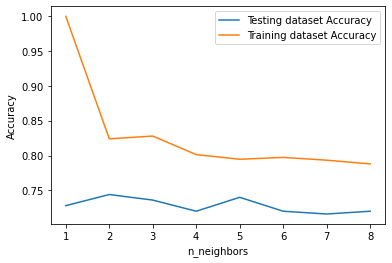

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
trainAccuracy = np.empty(len(neighbors))
testAccuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    trainAccuracy[i] = knn.score(X_train, y_train)
    testAccuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, testAccuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, trainAccuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Not very time resourceful
``` python
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
```